In [16]:
! pip install keras-facenet

In [17]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [3]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [18]:
!wget "https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1"

--2023-06-30 09:34:17--  https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving drive.google.com (drive.google.com)... 142.251.31.138, 142.251.31.101, 142.251.31.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.31.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2bgp1ugq7sehient22lpm2vlvrogsd1g/1688117625000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download&uuid=b04bdf10-9051-4d1a-bbf3-5ea931b58934 [following]
--2023-06-30 09:34:21--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2bgp1ugq7sehient22lpm2vlvrogsd1g/1688117625000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download&uuid=b04bdf10-9051-4d1a-bbf3-5ea931b58934
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 142.251.31.132, 2a00:

In [19]:
from keras_facenet import FaceNet

In [20]:
MyFaceNet = FaceNet()

In [21]:
folder='fotoMahasiswa/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)

    if (filename == '.ipynb_checkpoints'):
      break

    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

    if len(wajah)>0:
        x1, y1, width, height = wajah[0]
    else:
        x1, y1, width, height = 1, 1, 10, 10

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)

    face = gbr_array[y1:y2, x1:x2]

    face = Img.fromarray(face)
    face = face.resize((160,160))
    face = asarray(face)

    face = face.astype('float32')
    mean, std = face.mean(), face.std()
    face = (face - mean) / std

    face = expand_dims(face, axis=0)
    signature = MyFaceNet.embeddings(face)

    database[os.path.splitext(filename)[0]]=signature

1/1 [==============================] - 0s 29ms/step


In [22]:
database

{'gea': array([[ 0.01040816,  0.01323744, -0.08136159,  0.03703693, -0.00583527,
          0.09873081, -0.02493107,  0.06667081, -0.03646993, -0.02634571,
         -0.01645713,  0.07746423,  0.02978943, -0.03657426, -0.00851209,
         -0.02543744,  0.01909424,  0.03340083, -0.01135212, -0.12970872,
         -0.0935071 , -0.00186397,  0.0748404 , -0.04299357,  0.0325121 ,
         -0.01524374, -0.01608278, -0.04873963, -0.0436005 ,  0.02108769,
         -0.0094348 , -0.00025411,  0.00208787, -0.02367698, -0.0376133 ,
          0.06066557,  0.04307508, -0.01791337, -0.11657039,  0.02633475,
          0.01289765,  0.03899862, -0.00975663, -0.02284096,  0.03940052,
          0.0072353 ,  0.03982001,  0.08939082, -0.10278589, -0.0819013 ,
         -0.00515591,  0.00425586,  0.03345905, -0.0378776 , -0.07769363,
          0.08435166, -0.00782711,  0.05853548, -0.00762564, -0.02032344,
         -0.02597619,  0.07670611, -0.04924937, -0.04457959, -0.0437782 ,
          0.04477916,  0.028382

In [23]:
myfile = open("data.mhs", "wb")
pickle.dump(database, myfile)
myfile.close()

In [24]:
myfile = open("data.mhs", "rb")
database = pickle.load(myfile)
myfile.close()

In [25]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [26]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)

  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h

      face = gbr_array[y1:y2, x1:x2]

      face = Img.fromarray(face)
      face = face.resize((160,160))
      face = asarray(face)

      face = face.astype('float32')
      mean, std = face.mean(), face.std()
      face = (face - mean) / std

      face = expand_dims(face, axis=0)
      signature = MyFaceNet.embeddings(face)

      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key

      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)

  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)

  return filename

In [27]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  filename=findFaces(data)

  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 35ms/step
Saved to photo.jpg


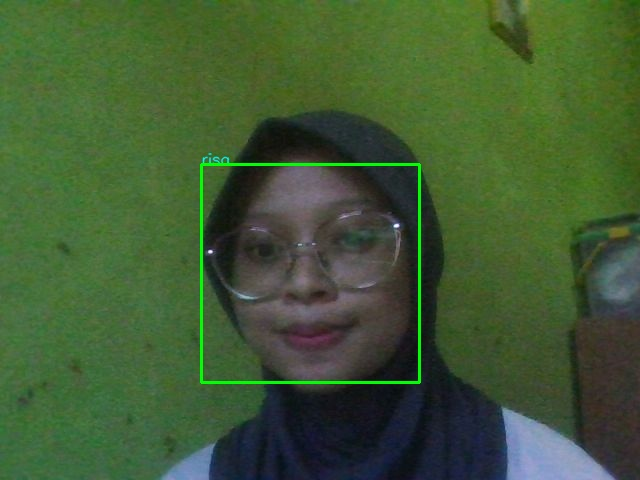

In [15]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))